In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Experiment to make

In [2]:
experiment = 'online' # 'offline' - 'finetuning' - 'online'

# Rename Folders and Creation of the Folders for the results

In [3]:
log_dir = "training_logs"
task_dirs = ["door", "hammer", "pen", "relocate"]

for run_folder in os.listdir(log_dir):
    run_path = os.path.join(log_dir, run_folder)
    if os.path.isdir(run_path) and not run_folder.startswith('.'):
        for task in task_dirs:
            task_path = os.path.join(run_path, task)
            if os.path.isdir(task_path):
                for subfolder in os.listdir(task_path):
                    full_path = os.path.join(task_path, subfolder)
                    if os.path.isdir(full_path) and "_" in subfolder:
                        base_name = subfolder.split("_")[0]
                        if base_name == "TD3PlusBC":
                            base_name = "TD3+BC"
                        new_path = os.path.join(task_path, base_name)
                        if not os.path.exists(new_path):
                            os.rename(full_path, new_path)
                            print(f"Renamed: {full_path} → {new_path}")
                        else:
                            print(f"Skipped (already exists): {new_path}")

Renamed: training_logs/online/door/CQL_online_20250518193113 → training_logs/online/door/CQL
Renamed: training_logs/online/door/AWAC_online_20250518193123 → training_logs/online/door/AWAC
Renamed: training_logs/online/door/TD3PlusBC_online_20250518193118 → training_logs/online/door/TD3+BC
Renamed: training_logs/online/door/IQL_online_20250518193108 → training_logs/online/door/IQL
Renamed: training_logs/online/hammer/TD3PlusBC_online_20250518193056 → training_logs/online/hammer/TD3+BC
Renamed: training_logs/online/hammer/AWAC_online_20250518193102 → training_logs/online/hammer/AWAC
Renamed: training_logs/online/hammer/CQL_online_20250518193049 → training_logs/online/hammer/CQL
Renamed: training_logs/online/hammer/IQL_online_20250518193043 → training_logs/online/hammer/IQL
Renamed: training_logs/online/pen/AWAC_online_20250518193021 → training_logs/online/pen/AWAC
Renamed: training_logs/online/pen/TD3PlusBC_online_20250518193018 → training_logs/online/pen/TD3+BC
Renamed: training_logs/on

In [4]:
path = os.path.join("results", experiment, "training_rewards")

if not os.path.exists(path):
    os.makedirs(path)
    print(f"Created: {path}")
else:
    print(f"Already exists: {path}")

Created: results/online/training_rewards


# Parameters for visualization

In [5]:
# Define a fixed order of algorithms for the plots
tasks = ['pen', 'relocate', 'hammer', 'door']
algorithms = ['IQL', 'CQL', 'BC', 'TD3+BC', 'AWAC']

if experiment != 'offline':
    algorithms.remove('BC')

# Assign a specific color to each algorithm
colors = {
    'IQL': 'tab:blue',
    'CQL': 'tab:orange',
    'BC': 'tab:green',
    'TD3+BC': 'tab:red',
    'AWAC': 'tab:purple'
}

# Reward Evolution

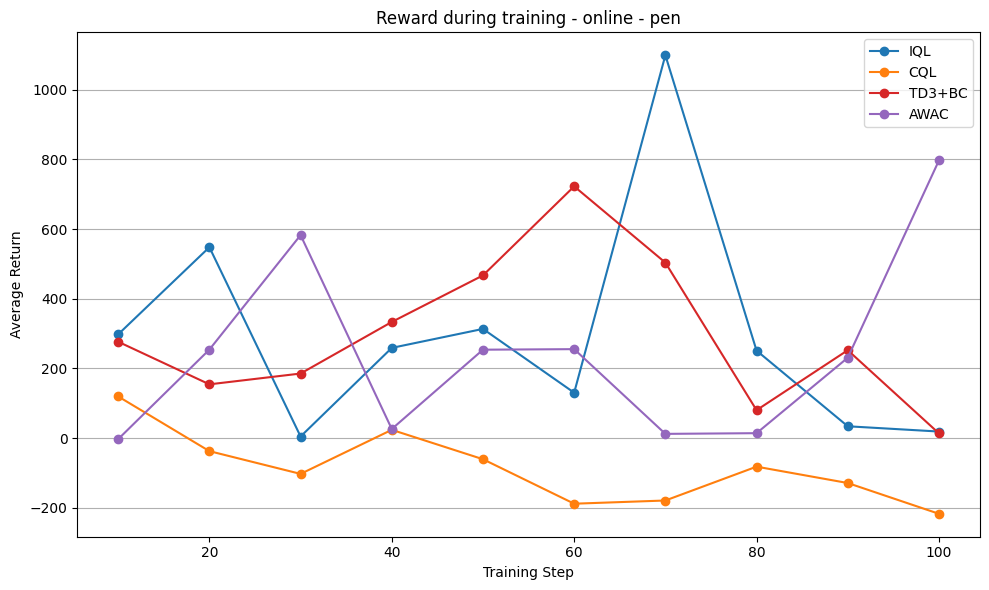

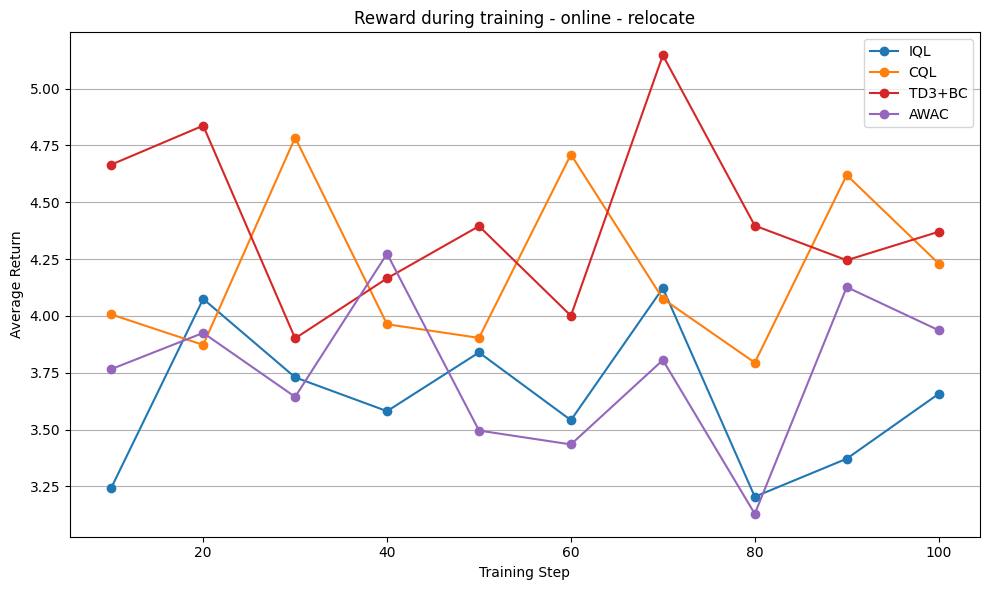

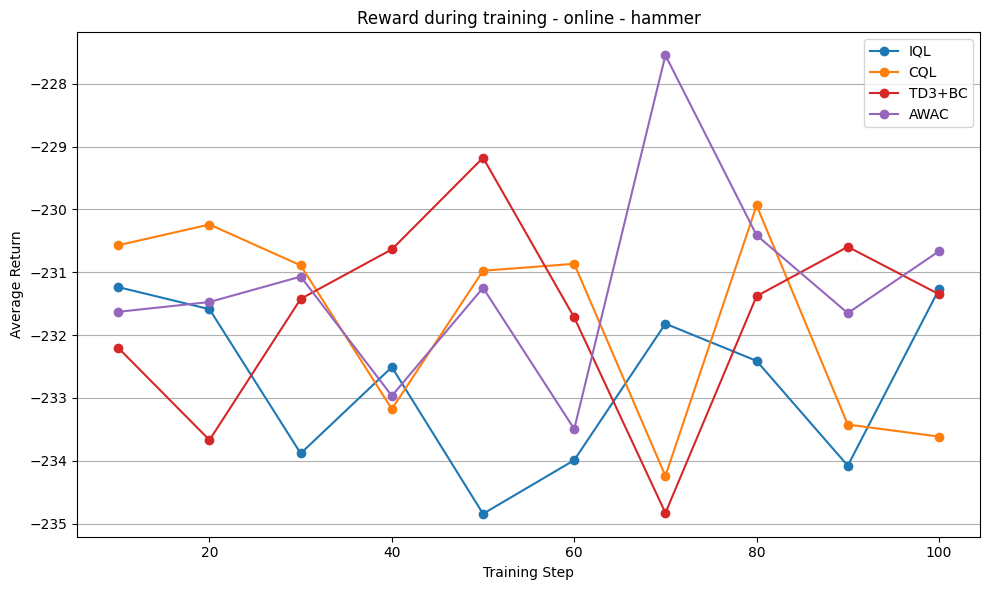

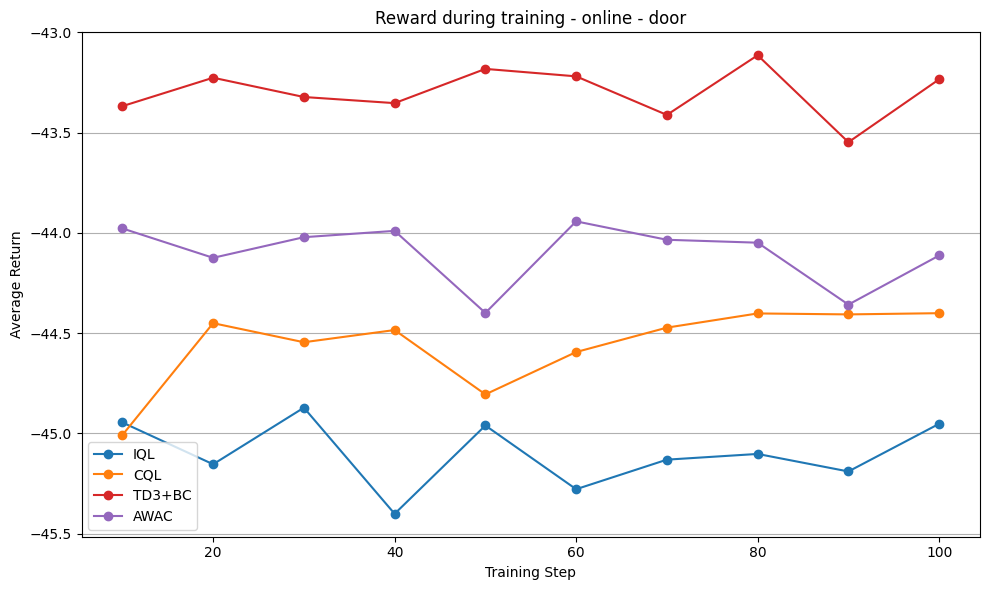

In [7]:
if experiment == 'offline':
    filename = 'environment'
elif experiment == 'finetuning':
    filename = 'rollout_return'
else:
    filename = 'evaluation'

# Genera un grafico per ogni task
for task in tasks:
    plt.figure(figsize=(10, 6))
    for algo in algorithms:
        df = pd.read_csv(f'training_logs/{experiment}/{task}/{algo}/{filename}.csv', header=None)
        df.columns = ['epoch', 'step', 'return']
        plt.plot(df['step'], df['return'], label=algo, color=colors[algo], marker='o')

    plt.xlabel("Training Step")
    plt.ylabel("Average Return")
    plt.title(f"Reward during training - {experiment} - {task}")
    plt.grid(True, axis='y')
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(f'results/{experiment}/training_rewards/{task}.png', dpi=300, bbox_inches='tight')
    
    plt.show()